In [4]:
import cv2
import os
from pathlib import Path
import shutil
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# Paths
video_folder = 'data/vid'
fall_folder = 'data/fall'
output_folder = 'preprocess'

# Create output folder if e no exist
os.makedirs(output_folder, exist_ok=True)

def extract_frames_from_videos(video_path, save_path, fps=1):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"❌ Cannot open video {video_path}")
        return

    video_name = os.path.splitext(os.path.basename(video_path))[0]
    frame_save_dir = os.path.join(save_path, video_name)
    os.makedirs(frame_save_dir, exist_ok=True)

    frame_rate = cap.get(cv2.CAP_PROP_FPS)
    interval = int(frame_rate / fps) if frame_rate > 0 else 1

    frame_count = 0
    saved_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count % interval == 0:
            frame = cv2.resize(frame, (224, 224))
            frame_path = os.path.join(frame_save_dir, f"{video_name}_frame{saved_count:03d}.jpg")
            cv2.imwrite(frame_path, frame)
            saved_count += 1

        frame_count += 1

    cap.release()
    print(f"✅ {video_name} — {saved_count} frames extracted.")

def process_videos():
    print("🎥 Starting frame extraction from videos...")
    for class_name in os.listdir(video_folder):
        class_path = os.path.join(video_folder, class_name)

        if not os.path.isdir(class_path):
            continue

        for subfolder in os.listdir(class_path):
            subfolder_path = os.path.join(class_path, subfolder)

            if not os.path.isdir(subfolder_path):
                continue

            for video_file in os.listdir(subfolder_path):
                if video_file.endswith('.mp4') or video_file.endswith('.avi'):
                    video_path = os.path.join(subfolder_path, video_file)
                    class_save_path = os.path.join(output_folder, class_name)
                    os.makedirs(class_save_path, exist_ok=True)
                    extract_frames_from_videos(video_path, class_save_path)

def process_fall_images():
    print("🖼️ Starting fall images processing...")
    fall_save_path = os.path.join(output_folder, 'fall')
    os.makedirs(fall_save_path, exist_ok=True)

    for img_file in os.listdir(fall_folder):
        img_path = os.path.join(fall_folder, img_file)
        if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (224, 224))
                save_path = os.path.join(fall_save_path, img_file)
                cv2.imwrite(save_path, img)

    print("✅ Fall images resized and saved.")

def main():
    process_videos()
    process_fall_images()
    print("🎯 Preprocessing done successfully!")

if __name__ == "__main__":
    main()


🎥 Starting frame extraction from videos...
✅ Fighting007_x264_2 — 3 frames extracted.
✅ Fighting007_x264_7 — 3 frames extracted.
✅ Fighting007_x264_5 — 3 frames extracted.
✅ Fighting007_x264_8 — 3 frames extracted.
✅ Fighting007_x264_4 — 3 frames extracted.
✅ Fighting007_x264_1 — 3 frames extracted.
✅ Fighting007_x264_3 — 3 frames extracted.
✅ Fighting007_x264_6 — 3 frames extracted.
✅ Fighting007_x264_0 — 3 frames extracted.
✅ Fighting013_x264_5 — 1 frames extracted.
✅ Fighting013_x264_9 — 1 frames extracted.
✅ Fighting013_x264_8 — 1 frames extracted.
✅ Fighting013_x264_6 — 1 frames extracted.
✅ Fighting013_x264_1 — 1 frames extracted.
✅ Fighting013_x264_3 — 1 frames extracted.
✅ Fighting013_x264_2 — 1 frames extracted.
✅ Fighting013_x264_7 — 1 frames extracted.
✅ Fighting013_x264_4 — 1 frames extracted.
✅ Fighting012_x264_5 — 1 frames extracted.
✅ Fighting012_x264_2 — 1 frames extracted.
✅ Fighting012_x264_3 — 1 frames extracted.
✅ Fighting012_x264_6 — 1 frames extracted.
✅ Fighting0

In [7]:


def count_images_in_preprocess(preprocess_folder='preprocess'):
    counts = {}

    for class_name in os.listdir(preprocess_folder):
        class_path = os.path.join(preprocess_folder, class_name)
        if os.path.isdir(class_path):
            total_images = 0
            for subfolder in os.listdir(class_path):
                subfolder_path = os.path.join(class_path, subfolder)
                if os.path.isdir(subfolder_path):
                    for item in os.listdir(subfolder_path):
                        if item.lower().endswith(('.jpg', '.jpeg', '.png')):
                            total_images += 1
                else:
                    # For "fall" class that has images directly
                    if subfolder.lower().endswith(('.jpg', '.jpeg', '.png')):
                        total_images += 1
            counts[class_name] = total_images

    return counts

# Example usage
if __name__ == "__main__":
    image_counts = count_images_in_preprocess()
    for class_name, count in image_counts.items():
        print(f"{class_name}: {count} images")


fighting: 45 images
normal: 121 images
explosion: 77 images
abuse: 207 images
fall: 100 images
stealing: 153 images


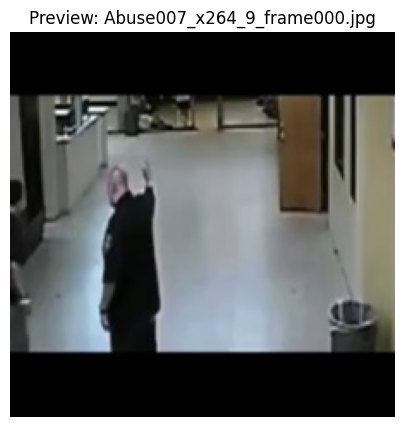

In [5]:

def show_specific_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("❌ Could not load image. Check the path.")
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Preview: {os.path.basename(image_path)}")
    plt.show()

# Example usage:
show_specific_image('/workspaces/abnormal_behaviour/my-dataset-project/preprocess/abuse/Abuse007_x264_9/Abuse007_x264_9_frame000.jpg')
